In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize


In [ ]:
Data = pd.read_csv('data.csv')
Data.describe()

,cpu,mem,dwps,drbps,numfile,meanwidths,numofthreads,iosize,Throughput,Latency
count,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000,15866.000000
mean,2.017900,630.833228,75.049792,76.234716,474.272028,47.466910,2.333039,5.999622,301300.011098,0.004169
std,1.333486,643.285589,52.111187,52.877170,334.531941,33.433326,1.247202,2.944020,119626.100736,0.003253
min,1.000000,100.000000,10.000000,10.000000,100.000000,10.000000,1.000000,3.000000,55844.901000,0.001000
25%,1.000000,100.000000,10.000000,10.000000,100.000000,10.000000,1.000000,3.000000,235603.865000,0.002000
50%,1.000000,500.000000,50.000000,50.000000,300.000000,30.000000,2.000000,5.000000,263210.211500,0.003000
75%,4.000000,1000.000000,100.000000,100.000000,500.000000,50.000000,4.000000,10.000000,299032.266500,0.005000
max,4.000000,2000.000000,150.000000,150.000000,1000.000000,100.000000,4.000000,10.000000,689499.369000,0.054000


In [ ]:
X = Data.iloc[:,0:8]  #Input Parameters
y = Data.iloc[:,-1]    #Latency 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


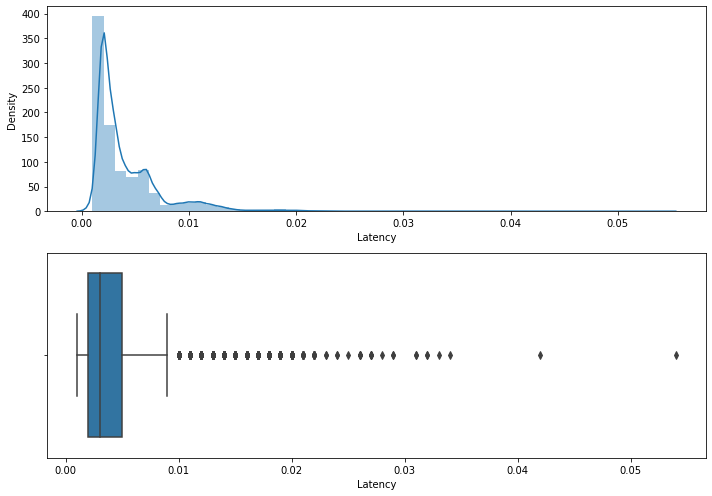

In [ ]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['Latency'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['Latency'])
plt.tight_layout()
plt.savefig('LatencyDist.png')

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(mutual_info_regression, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 8 best features


          Specs     Score
0           cpu  0.175970
6  numofthreads  0.140626
1           mem  0.071592
5    meanwidths  0.009013
2          dwps  0.005895
4       numfile  0.005032
7        iosize  0.002420
3         drbps  0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

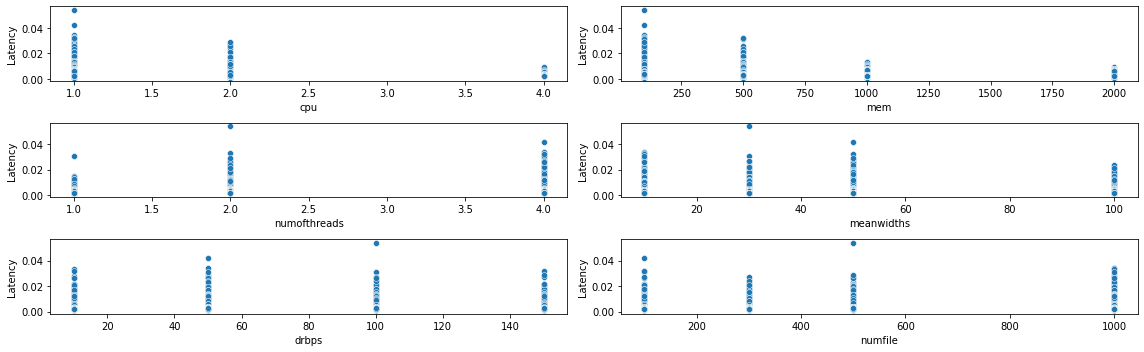

In [ ]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(3,2,1)
sns.scatterplot(Data['cpu'], Data['Latency'])
fig.add_subplot(3,2,2)
sns.scatterplot(Data['mem'],Data['Latency'])
fig.add_subplot(3,2,3)
sns.scatterplot(Data['numofthreads'],Data['Latency'])
fig.add_subplot(3,2,4)
sns.scatterplot(Data['meanwidths'], Data['Latency'])
fig.add_subplot(3,2,5)
sns.scatterplot(Data['drbps'],Data['Latency'])
fig.add_subplot(3,2,6)
sns.scatterplot(Data['numfile'],Data['Latency'])
fig.tight_layout() 
fig.savefig('LatencyvsAll.png')

In [ ]:
X.shape

(15866, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')


29.359571691950535 %


In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

0.0060810904386210535
[-1.13547719e-03 -1.68283757e-06 -2.50230114e-06 -1.40374066e-06
 -1.16949952e-07  1.47505084e-06  7.42250093e-04  2.43598080e-07]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_csv('LRLatencyAll.csv')
df1 = df.head(10)
df1

,Actual,Predicted
920,0.008,0.005295
5034,0.003,0.004613
8617,0.003,0.002532
15818,0.002,0.001318
10884,0.006,0.004652
13959,0.004,0.003523
3864,0.003,0.005126
13615,0.002,0.003581
356,0.019,0.006211
11545,0.002,0.004206


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.0018286967144077386
MSE: 7.104543929547279e-06
RMSE: 0.002665435035701917
VarScore: 0.2937359764898744


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape,  y_test.shape)

(10630, 8) (5236, 8) (10630,) (5236,)


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
333/333 [==============================] - 2s 3ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 4.7071e-05 - val_mean_squared_error: 4.7071e-05
Epoch 2/100
333/333 [==============================] - 1s 3ms/step - loss: 3.6734e-05 - mean_squared_error: 3.6734e-05 - val_loss: 2.7688e-05 - val_mean_squared_error: 2.7688e-05
Epoch 3/100
333/333 [==============================] - 1s 3ms/step - loss: 2.8996e-05 - mean_squared_error: 2.8996e-05 - val_loss: 2.6072e-05 - val_mean_squared_error: 2.6072e-05
Epoch 4/100
333/333 [==============================] - 1s 2ms/step - loss: 2.7714e-05 - mean_squared_error: 2.7714e-05 - val_loss: 2.5677e-05 - val_mean_squared_error: 2.5677e-05
Epoch 5/100
333/333 [==============================] - 1s 3ms/step - loss: 2.7218e-05 - mean_squared_error: 2.7218e-05 - val_loss: 2.5413e-05 - val_mean_squared_error: 2.5413e-05
Epoch 6/100
333/333 [==============================] - 1s 2ms/step - loss: 2.6795e-05 - mean_squared_error: 2.679

In [ ]:
predict = model.predict(X_test, batch_size=32) 
pred = predict.flatten()
pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
#pred1 = pred.head(10)
#print(pred)
pred.to_csv('NNLatencyAll.csv')
